In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zf
import os
import random
import cv2
import pickle
from imutils import build_montages
from imutils import paths
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from skimage import feature
from google.colab.patches import cv2_imshow



In [4]:
sns.set()
os.getcwd()


'/content'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
handle_spiral = zf.ZipFile('/content/drive/MyDrive/dataset1.zip')
handle_spiral.extractall('dataset1')
handle_spiral.close()

In [8]:
spiral_train_healthy = os.listdir('/content/dataset1/DataCollection/spiral/training/healthy/')
spiral_train_park = os.listdir('/content//dataset1/DataCollection/spiral/training/parkinson/')

fp_spiral_train_healthy = '/content/dataset1/DataCollection/spiral/training/healthy/'
fp_spiral_train_park = '/content/dataset1/DataCollection/spiral/training/parkinson/'

spiral_test_healthy = os.listdir('/content/dataset1/DataCollection/spiral/testing/healthy/')
spiral_test_park = os.listdir('/content/dataset1/DataCollection/spiral/testing/parkinson/')

fp_spiral_test_healthy = '/content/dataset1/DataCollection/spiral/testing/healthy/'
fp_spiral_test_park = '/content/dataset1/DataCollection/spiral/testing/parkinson/'


In [27]:
def quantify_image(image):
  features = feature.hog(image,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features



In [28]:
trainX = []
testX = []
outputs = []
trainY = []
testY = []

for i in spiral_train_healthy:
  image = cv2.imread(fp_spiral_train_healthy+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image =cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('healthy')

for i in spiral_train_park:
  image = cv2.imread(fp_spiral_train_park+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('parkinson')

for i in spiral_test_healthy:
  image = cv2.imread(fp_spiral_test_healthy+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('healthy')

for i in spiral_test_park:
  image = cv2.imread(fp_spiral_test_park+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('parkinson')

In [29]:
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)
trainX


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
trainY


array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson'], dtype='<U9')

In [31]:
testX


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
testY


array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson'], dtype='<U9')

In [33]:
le = LabelEncoder()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)
print(trainX.shape,trainY.shape)


(72, 12996) (72,)


In [34]:
trainY


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [35]:
testY


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
print("Training model....")
model = RandomForestClassifier(n_estimators=100)
model.fit(trainX,trainY)


Training model....


RandomForestClassifier()

In [37]:
preds = model.predict(testX)
preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1])

In [38]:
cnf = confusion_matrix(testY,preds)
cnf

array([[14,  1],
       [ 3, 12]])

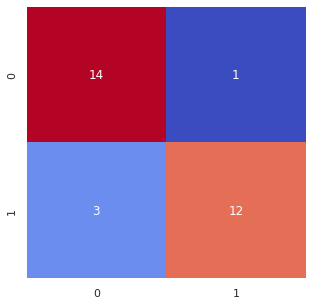

In [39]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [40]:
acc = metrics.accuracy_score(testY,preds)
acc


0.8666666666666667

In [41]:
indexes = np.random.randint(0,30,25)
indexes

array([12, 17,  6,  9, 22, 11, 25, 10,  1, 15, 10, 29,  9, 28, 10, 25,  1,
        3,  8,  5,  9,  9,  2, 15, 25])

In [42]:
testpath=list(paths.list_images(fp_spiral_train_healthy))
idxs=np.arange(0,len(testpath))
idxs=np.random.choice(idxs,size=(25,),replace=False)
images=[]

for i in idxs:
    image=cv2.imread(testpath[i])
    output=image.copy()
    output=cv2.resize(output,(128,128))
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(200,200))
    image=cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    features= quantify_image(image)
    preds=model.predict([features])
    label=le.inverse_transform(preds)[0]
    if label=="healthy":
      color=(0,255,0) 
    else:
      (0,0,255)
    cv2.putText(output,label, (3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
    images.append(output)


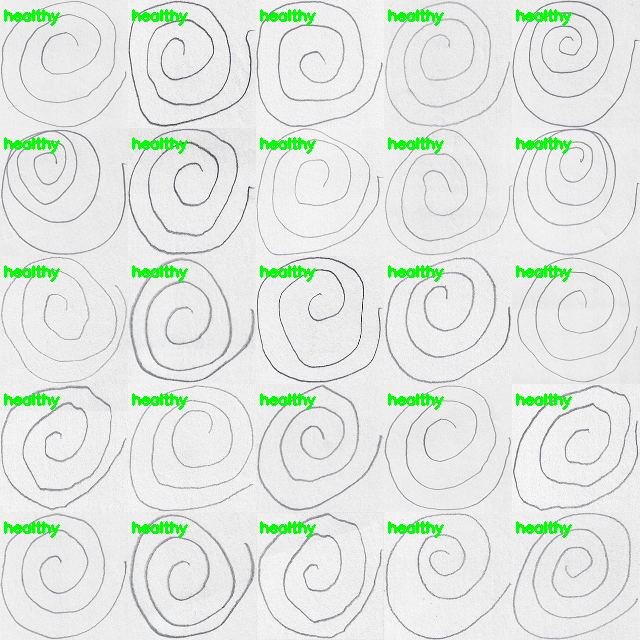

-1

In [43]:
'''montage = build_montages(images,(128,128),(5,5))[0]
cv2.imshow(montage)
cv2.waitKey(0)'''

montage=build_montages(images,(128,128),(5,5))[0]
cv2_imshow(montage)
cv2.waitKey(0)

In [44]:
predictions = model.predict(testX)

cm = confusion_matrix(testY, predictions).flatten()
print(cm)
(tn, fp, fn, tp) = cm
accuracy = (tp + tn) / float(cm.sum())
print(accuracy)

[14  1  3 12]
0.8666666666666667


In [45]:
pickle.dump(model,open('parkinson.pkl','wb')) 